<a href="https://colab.research.google.com/github/michaeljf00/projects_in_ml_and_ai/blob/main/homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Homework 3: Deep Learning**

**Task 1 (10 points)**: Assuming you are not familiar with the framework, in this part of the homework you will present your research describing the resources you used to learn the framework (must include links to all resources). Clearly explain why you needed a particular resource for implementing a 2-layer Neural Network (NN). (Consider how you will keep track of all the computations in a NN i.e., what libraries/tools do you need within this framework.

I do not have much experience with AI/ML frameworks. The one I decided to use for this homework is TensorFlow since there is much documentation available with beginnner tutorials and quickstart guides. The overview starts with providing links to resources as well as a brief description (https://www.tensorflow.org/overview).  

The framework has a beginner-friendly quickstart guide and has tutorials that get you started with the implementation. In particular for the beginners guide, its unique use of the sequential API Keras makes putting together a model much more straightfoward. To understand at the architecture of Keras, I referred to this resource: https://www.tensorflow.org/guide/intro_to_modules#keras_models_and_layers and looked at videos online looking at examples of its use, going through and understanding its features.

To review the structure of neural networks, I looked at this video by the youtube creater 3Blue1Brown, a channel credited for giving resources for many mathematical concepts: https://www.youtube.com/watch?v=aircAruvnKk. 

**Task 2 (60 points)**: Once you have figured the resources you need for the project, design, and
implement your project. The project must include the following steps (it’s not 
limited to these
steps):
1. Exploratory Data Analysis (Can include data cleaning, visualization etc.)
2. Perform a train-dev-test split.
3. Implement forward propagation (clearly describe the activation functions and other
hyper-parameters you are using).
4. Compute the final cost function.
5. Implement gradient descent (any variant of gradient descent depending upon your
data and project can be used) to train your model. In this step it is up to you as someone
in charge of their project to improvise using optimization algorithms (Adams, RMSProp
etc.) and/or regularization.
6. Present the results using the test set.

Dataset: https://www.kaggle.com/c/digit-recognizer/data

*Exploratory Data Analysis*

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import DenseFeatures, Dense, Dropout

In [4]:
df_training_set = pd.read_csv("drive/MyDrive/digit_identification_training_set.csv")

The dataset that will be used is the digit identification because of its many columns of features and it is a widely used dataset in deep learning models.

In [5]:
df_training_set.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
len(df_training_set)

42000

With 42000 observations, this is more than a sufficient amount of data needed to create an accurate model.

In [7]:
df_training_set.nunique()

label       10
pixel0       1
pixel1       1
pixel2       1
pixel3       1
            ..
pixel779     3
pixel780     1
pixel781     1
pixel782     1
pixel783     1
Length: 785, dtype: int64

In [8]:
print(f"Training Dataset Shape {df_training_set.shape}", end="\n\n")
print(f"{df_training_set.info(null_counts=True)}", end="\n\n")

Training Dataset Shape (42000, 785)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  


In [9]:
df_training_set[df_training_set.isna().any(axis=1)] # Select NaN Rows

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


In [10]:
df_training_set.dropna(inplace=True)
len(df_training_set)

42000

The shape is expected of what a deep learning model dataset should be. All 42000 entries are clean without any NaN values. Even exceuting a *dropna* to remove any possible NaN values, the amount of values stay the same. This is a clean dataset and no further preprocessing needs to be done.

In [11]:
df_training_set.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


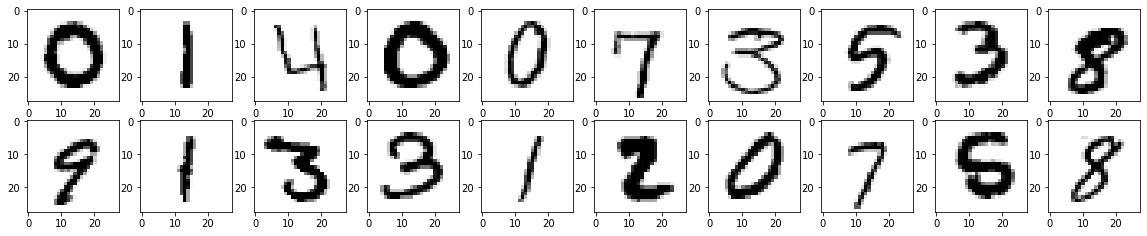

In [12]:
plt.figure(figsize=(20, 20))

for i in range(1, 21):
  q = df_training_set.iloc[i:i+1, 1:].values
  plt.subplot(10, 10, i)

  plt.imshow(q.reshape(28, 28), cmap=plt.cm.binary)

These are examples of the images that will be processed during visualization.

*Train-dev-test split*

In [13]:
SEED = 7358

In [43]:
SIZE = 64

train, test = train_test_split(df_training_set, test_size=0.1)
train, val = train_test_split(train, test_size=0.1)

def dataframe_to_tf_dataset(df):
  labels = df.pop("label")
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  ds = ds.shuffle(buffer_size=len(df), seed=SEED)
  return ds.batch(SIZE)

ds_train = dataframe_to_tf_dataset(train)
ds_val = dataframe_to_tf_dataset(val)
ds_test = dataframe_to_tf_dataset(test)

Here we split the trainning set into more sets for testing, validation and training. A random seed will be used for shuffling and will use a set batch size for mini batch gardient descent.

*Forward Propogation*

In [50]:
columns = list()
for i in range(1, len(df_training_set.columns)):
  columns.append(df_training_set.columns[i])

features = list()
for feat in columns:
  features.append(tf.feature_column.numeric_column(feat))

In [141]:
class NeuralNetwork(tf.keras.Model):
  def __init__(self, features):
    super().__init__()
    self.features = DenseFeatures(features)
    self.dense1 = Dense(100, activation="relu")
    self.dense2 = Dense(100, activation="relu")
    self.dropout = Dropout(0.1)
    self.dense3 = Dense(10, activation="softmax")

  def call(self, inputs):
    x = self.features(inputs)
    x = self.dense1(x)
    x = self.dense2(x)
    return self.dense3(x)




In [142]:
model = NeuralNetwork(features)

In [146]:
model.compile(optimizer="Adagrad", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) # Cost function: Sparse Catergorical Cross Entropy

In [147]:
model.fit(ds_train, validation_data=ds_val, epochs=4)

Epoch 1/4
532/532 [==============================] - 67s 78ms/step - loss: 0.1303 - accuracy: 0.9661 - val_loss: 0.3172 - val_accuracy: 0.9447
Epoch 2/4
532/532 [==============================] - 41s 60ms/step - loss: 0.0867 - accuracy: 0.9757 - val_loss: 0.3197 - val_accuracy: 0.9452
Epoch 3/4
532/532 [==============================] - 39s 57ms/step - loss: 0.0734 - accuracy: 0.9786 - val_loss: 0.3152 - val_accuracy: 0.9450
Epoch 4/4
532/532 [==============================] - 41s 60ms/step - loss: 0.0658 - accuracy: 0.9805 - val_loss: 0.3186 - val_accuracy: 0.9463


In [148]:
loss, accuracy = model.evaluate(ds_test)
print(f"Accuracy: {accuracy}")

66/66 [==============================] - 5s 51ms/step - loss: 0.3054 - accuracy: 0.9488
Accuracy: 0.9488095045089722


By creating the Neural Network class, we can adjust the parameters easily and optimize the model to get the best result. The loss function being used is *Sparse Categorical Cross Entropy*. The model had a specified batch amount, which is mini batch gradient descent. On top this, it is optimized by using the Adagrad method, producing good performance. It has an accuracy of 95, signifying an accurate and well performing model.

**Task 3 (10 points)**: In task 2 describe how you selected the hyperparameters. What was the
rationale behind the technique you used? Did you use regularization? Why, or why not? Did you use
an optimization algorithm? Why or why not?

The process of choosing the correct hyperparemeters was mainly using trial and error and seeing what worked the best. Just using default settings gave a decent perfomance. The loss greatly decreased when the cost function was set to Sparse Catergorical cross Entropy. The accuracy also increased when optimizing with Adagrad and it still kept the loss at a low value. This optimization was one I used in previous models where it performed well. The batch size was kept small due to overfitting, which was apparent due to the loss values increasing with larger sizes. Because of the high performance along with the low cost, I did not find it neccessary to use a regularization algorithm. I am unsure how much regularization would further imorove the performance but because resource that I read, I think it could improve up to 0.97 possibly if the other hyperparameters are fine-tuned along with it.

**Task 4 (20 points)**:  Create another baseline model (can be any model we covered so far except a
deep learning model). Using the same training data (as above) train your model and evaluate
results using the test set. Compare the results of both models (the Neural Network and the
baseline model). What are the reasons for one model performing better (or not) than the
other? Explain.

In [121]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from numpy import mean, std

In [124]:
X = df_training_set.drop("label", axis=1).to_numpy()
Y = df_training_set["label"].to_numpy()

In [102]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=SEED)

In [137]:
def analyzeData(model, X_test=X_test, Y_test=Y_test):
  Y_pred = model.predict(X_test)
  print(f"Confusion Matrix:\n{confusion_matrix(Y_test, Y_pred)}")
  print(f"Accuracy: {accuracy_score(Y_test, Y_pred)}")
  print(f"Precision: {precision_score(Y_test, Y_pred, average='micro')}\n")

In [139]:
randomForestModel = RandomForestClassifier(random_state=SEED)
randomForestModel.fit(X_train, Y_train)

RandomForestClassifier(random_state=7358)

In [140]:
analyzeData(randomForestModel)

Confusion Matrix:
[[1042    0    1    0    3    2    4    1    7    0]
 [   0 1151    4    0    1    0    2    2    3    0]
 [   3    4 1038    5    8    1    3    8    6    0]
 [   3    0   23 1002    1   14    2    6    8    5]
 [   3    2    3    0  966    0    3    4    3   20]
 [   7    0    4   17    0  893    9    0    5    4]
 [   7    1    1    0    2    8 1014    0    7    0]
 [   0    5   13    2    7    1    0 1056    2   18]
 [   4    6    5   11    3    6    7    1  951   11]
 [   2    2    2   16    8    4    1   11    8  991]]
Accuracy: 0.9622857142857143
Precision: 0.9622857142857143



The other baseline model I decided to use to compare with the neural network is the decision tree algorithm random forest. Comparing the accuracy between both, they match up almost identically, outperforming the neural network by 0.01. Random forest is made of many decision trees with a better hanlding of avoiding overfitting compared to neural networks. This algorithm is designed for classification problems which makes it an appropriate model for this dataset. It also takes less compuitational time compared to neural networks. A reason that this performs slightly better could be because of the multiple decision trees minimizing variance, converging to more concise results. The neural networks had percautions in-place to minimize overfitting, such as using smaller batch sizes and having a dropout layer. This still may not be enough and more hyperparemeters may need to be changed.